# Publication-Quality PyGMT Section Plots

Generate beautiful PyGMT section plots for:
1. M212 072 towyo section
2. M212 074 towyo section
3. Additional hydrographic sections

All plots include CT, SA, and water depth annotations using PyGMT for professional publication quality.

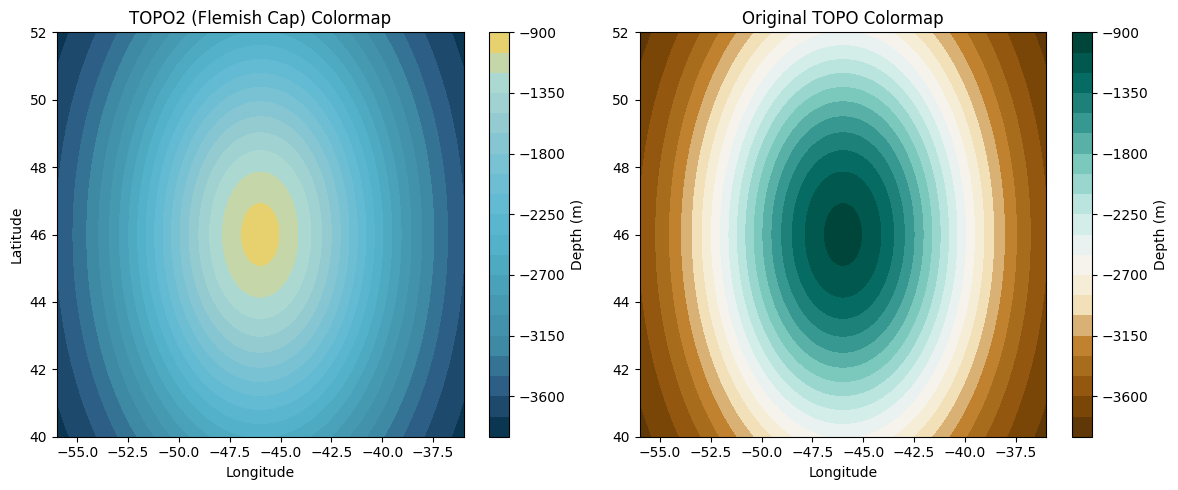

Default bathymetry colormap: TOPO2
PyGMT colormap path: /Users/eddifying/Cloudfree/github/oceanvis-py/oceanvis_py/config/saved_colormaps/topo_negative.cpt
Style 'flemish_cap': /Users/eddifying/Cloudfree/github/oceanvis-py/oceanvis_py/config/saved_colormaps/topo_negative.cpt
Style 'topo2': /Users/eddifying/Cloudfree/github/oceanvis-py/oceanvis_py/config/saved_colormaps/topo_negative.cpt
Style 'topo': /Users/eddifying/Cloudfree/github/oceanvis-py/oceanvis_py/config/saved_colormaps/topo.cpt


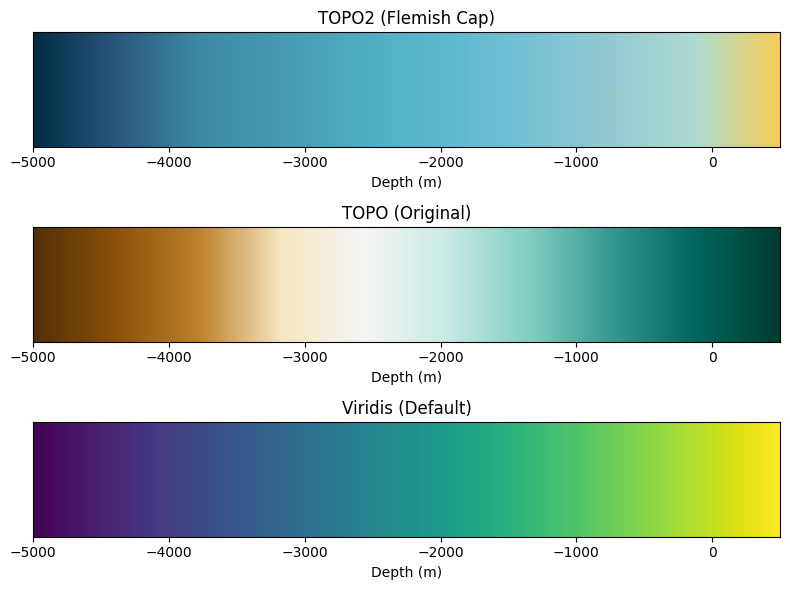

Available custom colormaps:
  TEMP2: TEMP2
  TEMP: TEMP
  SAL: SAL
  TOPO: TOPO
  TOPO2: TOPO2
  POLAR: POLAR
  OXY: OXY
  PurGre: PurGre
  CHL: CHL
  Y2R: Y2R
  BLUE: BLUE
  CAT: CAT


In [4]:
  # Test the new TOPO2 (Flemish Cap) colormap
  import matplotlib.pyplot as plt
  import numpy as np
  from oceanvis_py.core.colormaps import get_oceanographic_colormap, get_bathymetry_colormap
  from oceanvis_py.core.custom_colormaps import CUSTOM_COLORMAPS

  # Create sample bathymetry data
  x = np.linspace(-56, -36, 100)
  y = np.linspace(40, 52, 100)
  X, Y = np.meshgrid(x, y)
  # Simulate bathymetry: deeper in center, shallower near edges
  Z = -4000 + 3000 * np.exp(-((X + 46)**2 + (Y - 46)**2) / 50)

  # Plot 1: Test TOPO2 colormap directly
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

  # TOPO2 (Flemish Cap bathymetry)
  im1 = ax1.contourf(X, Y, Z, levels=20, cmap=CUSTOM_COLORMAPS["TOPO2"])
  ax1.set_title("TOPO2 (Flemish Cap) Colormap")
  ax1.set_xlabel("Longitude")
  ax1.set_ylabel("Latitude")
  plt.colorbar(im1, ax=ax1, label="Depth (m)")

  # Original TOPO for comparison
  im2 = ax2.contourf(X, Y, Z, levels=20, cmap=CUSTOM_COLORMAPS["TOPO"])
  ax2.set_title("Original TOPO Colormap")
  ax2.set_xlabel("Longitude")
  plt.colorbar(im2, ax=ax2, label="Depth (m)")

  plt.tight_layout()
  plt.show()

  # Test automatic colormap selection
  bathymetry_cmap = get_oceanographic_colormap("bathymetry")
  print(f"Default bathymetry colormap: {bathymetry_cmap.name}")

  # Test PyGMT colormap path
  cpt_path = get_bathymetry_colormap("flemish_cap")
  print(f"PyGMT colormap path: {cpt_path}")

  # Show available bathymetry styles
  for style in ["flemish_cap", "topo2", "topo"]:
      try:
          path = get_bathymetry_colormap(style)
          print(f"Style '{style}': {path}")
      except Exception as e:
          print(f"Style '{style}': {e}")

  # Create a colorbar comparison
  fig, axes = plt.subplots(3, 1, figsize=(8, 6))

  # Sample data range from deep ocean to land
  depths = np.linspace(-5000, 500, 256).reshape(1, -1)

  # Plot each colormap
  colormaps = [
      ("TOPO2 (Flemish Cap)", CUSTOM_COLORMAPS["TOPO2"]),
      ("TOPO (Original)", CUSTOM_COLORMAPS["TOPO"]),
      ("Viridis (Default)", plt.cm.viridis)
  ]

  for i, (name, cmap) in enumerate(colormaps):
      im = axes[i].imshow(depths, cmap=cmap, aspect='auto', extent=[-5000, 500, 0, 1])
      axes[i].set_title(name)
      axes[i].set_xlabel("Depth (m)")
      axes[i].set_yticks([])

  plt.tight_layout()
  plt.show()

  # Quick test of all available custom colormaps
  print("Available custom colormaps:")
  for name, cmap in CUSTOM_COLORMAPS.items():
      print(f"  {name}: {cmap.name}")

## Data Loading

/Users/eddifying/Cloudfree/github/oceanvis-py/oceanvis_py/plots/maps.py:166: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(


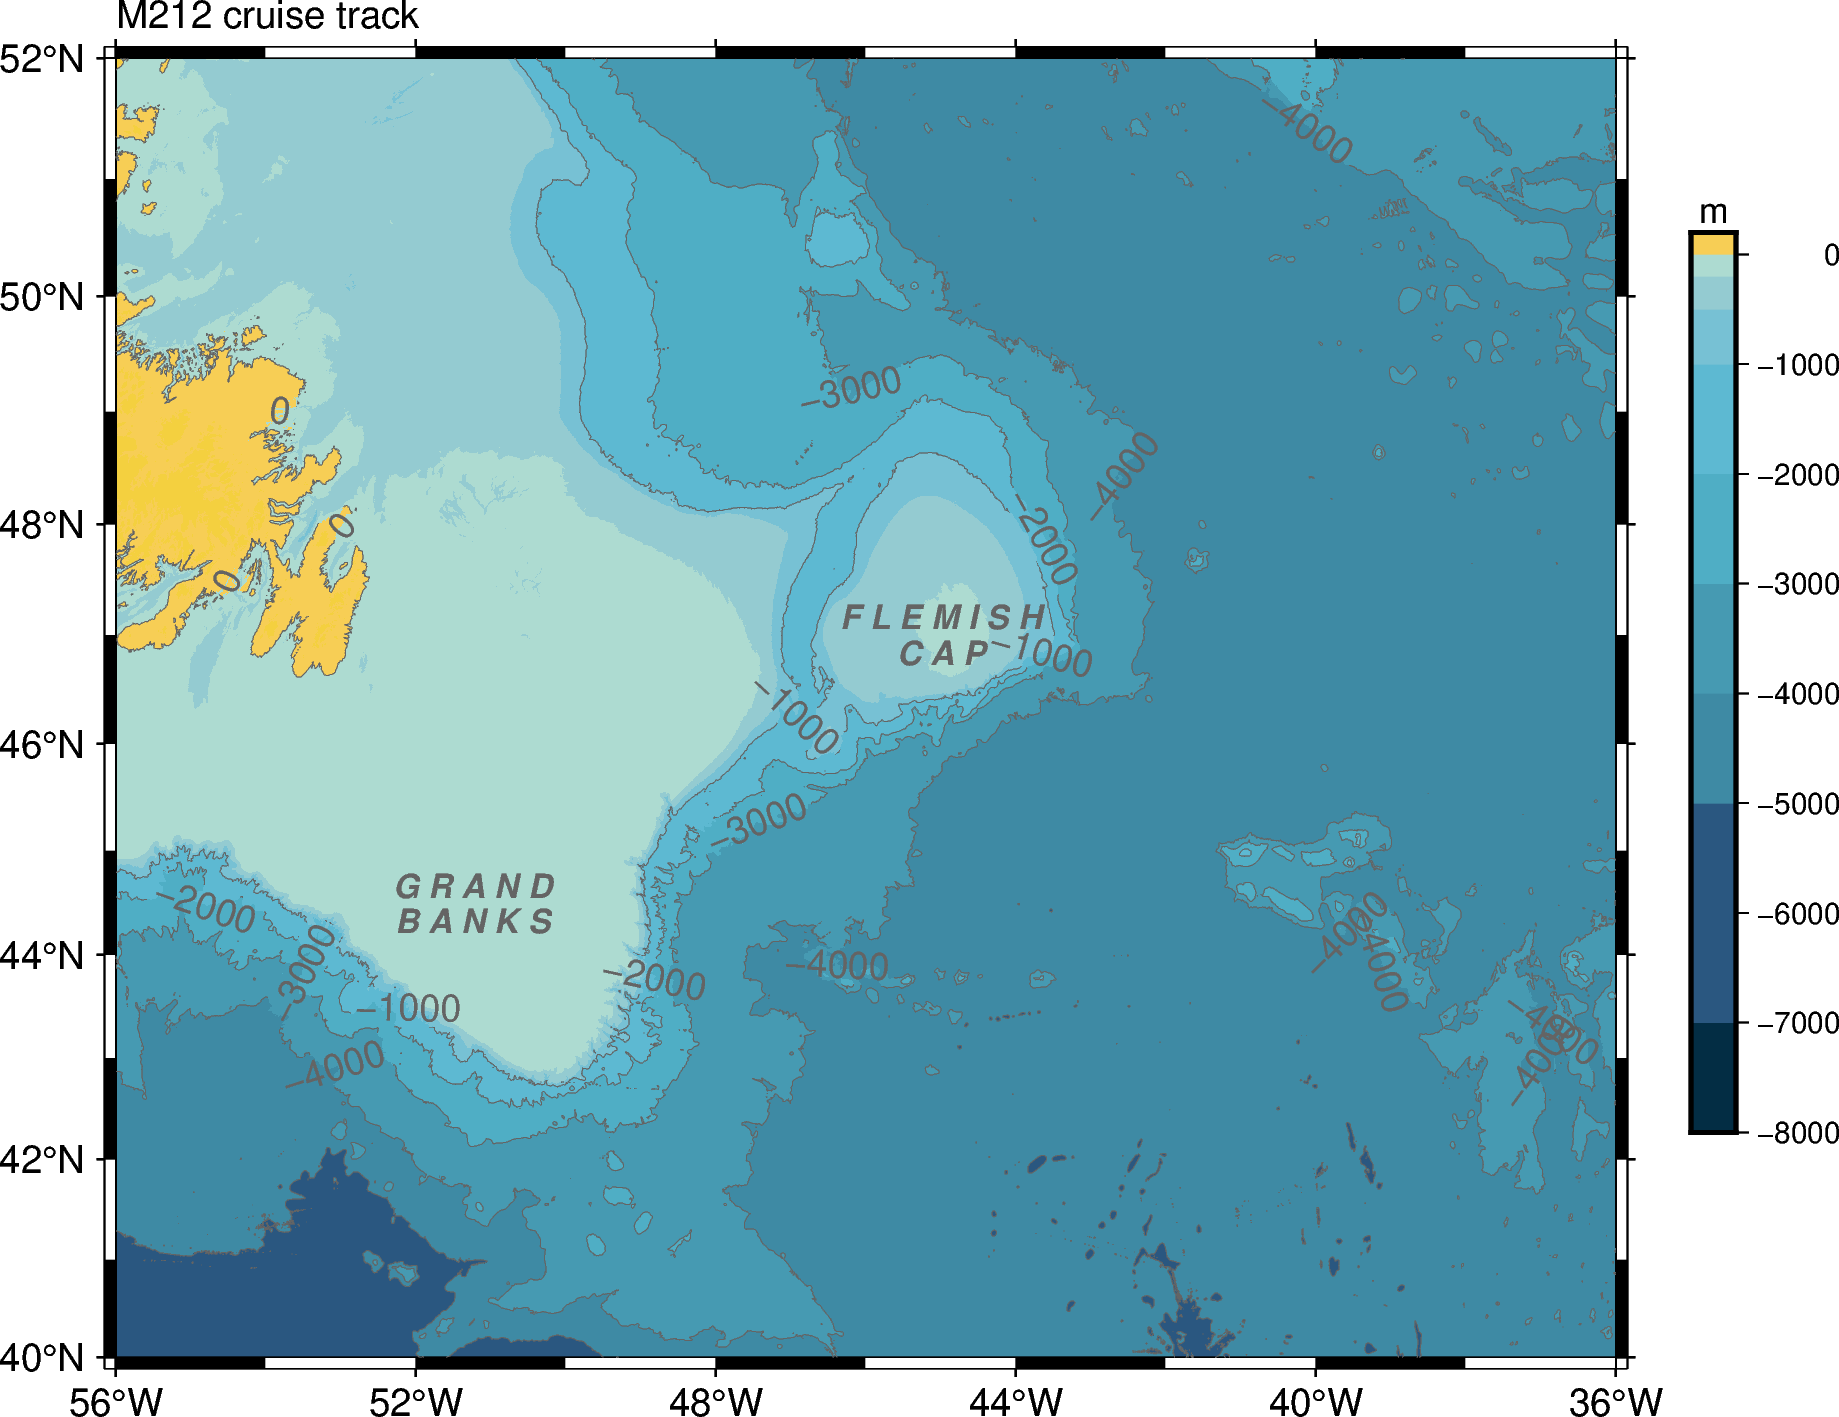

✓ Created complete map with annotations


In [5]:
# Updated approach using fixed oceanvis-py plot_bathymetry_map function
from oceanvis_py.plots.maps import plot_bathymetry_map
from oceanvis_py.core.colormaps import get_bathymetry_colormap
from pathlib import Path

# Define region
region = (-56, -36, 40, 52)
bathymetry_file = "/Users/eddifying/Dropbox/data/GEBCO2/netcdf/M212_bathy_38N.52N_056W.036W.nc"

try:
    # Get the figure object to continue adding annotations
    fig, output_file, temp_bathy = plot_bathymetry_map(
        bathymetry_file=bathymetry_file,
        region=region,
        projection="M5i",
        cpt_file=get_bathymetry_colormap("flemish_cap"),
        title="M212 cruise track",
        output_file="map_m212_complete.png",
        dpi=300,
        return_figure=True  # Get figure object back
    )

    # Add the geographic annotations to the same figure
    fig.text(x=-51.25, y=44.55, text="G R A N D", justify="CB",
            font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)
    fig.text(x=-51.25, y=44.45, text="B A N K S", justify="CT",
            font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)
    fig.text(x=-45, y=47.05, text="F L E M I S H", justify="CB",
            font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)
    fig.text(x=-45, y=46.95, text="C A P", justify="CT",
            font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)

    # Save the complete map with annotations
    fig.savefig("map_m212_complete.png", dpi=300)
    fig.show()

    # Clean up temporary file
    try:
        Path(temp_bathy).unlink()
    except FileNotFoundError:
        pass

    print(f"✓ Created complete map with annotations")

except Exception as e:
    print(f"Error: {e}")
    print("Check that PyGMT is properly installed and the bathymetry file path is correct")

Copied: ship_track_m212.xy


/Users/eddifying/Cloudfree/github/oceanvis-py/oceanvis_py/plots/maps.py:166: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(


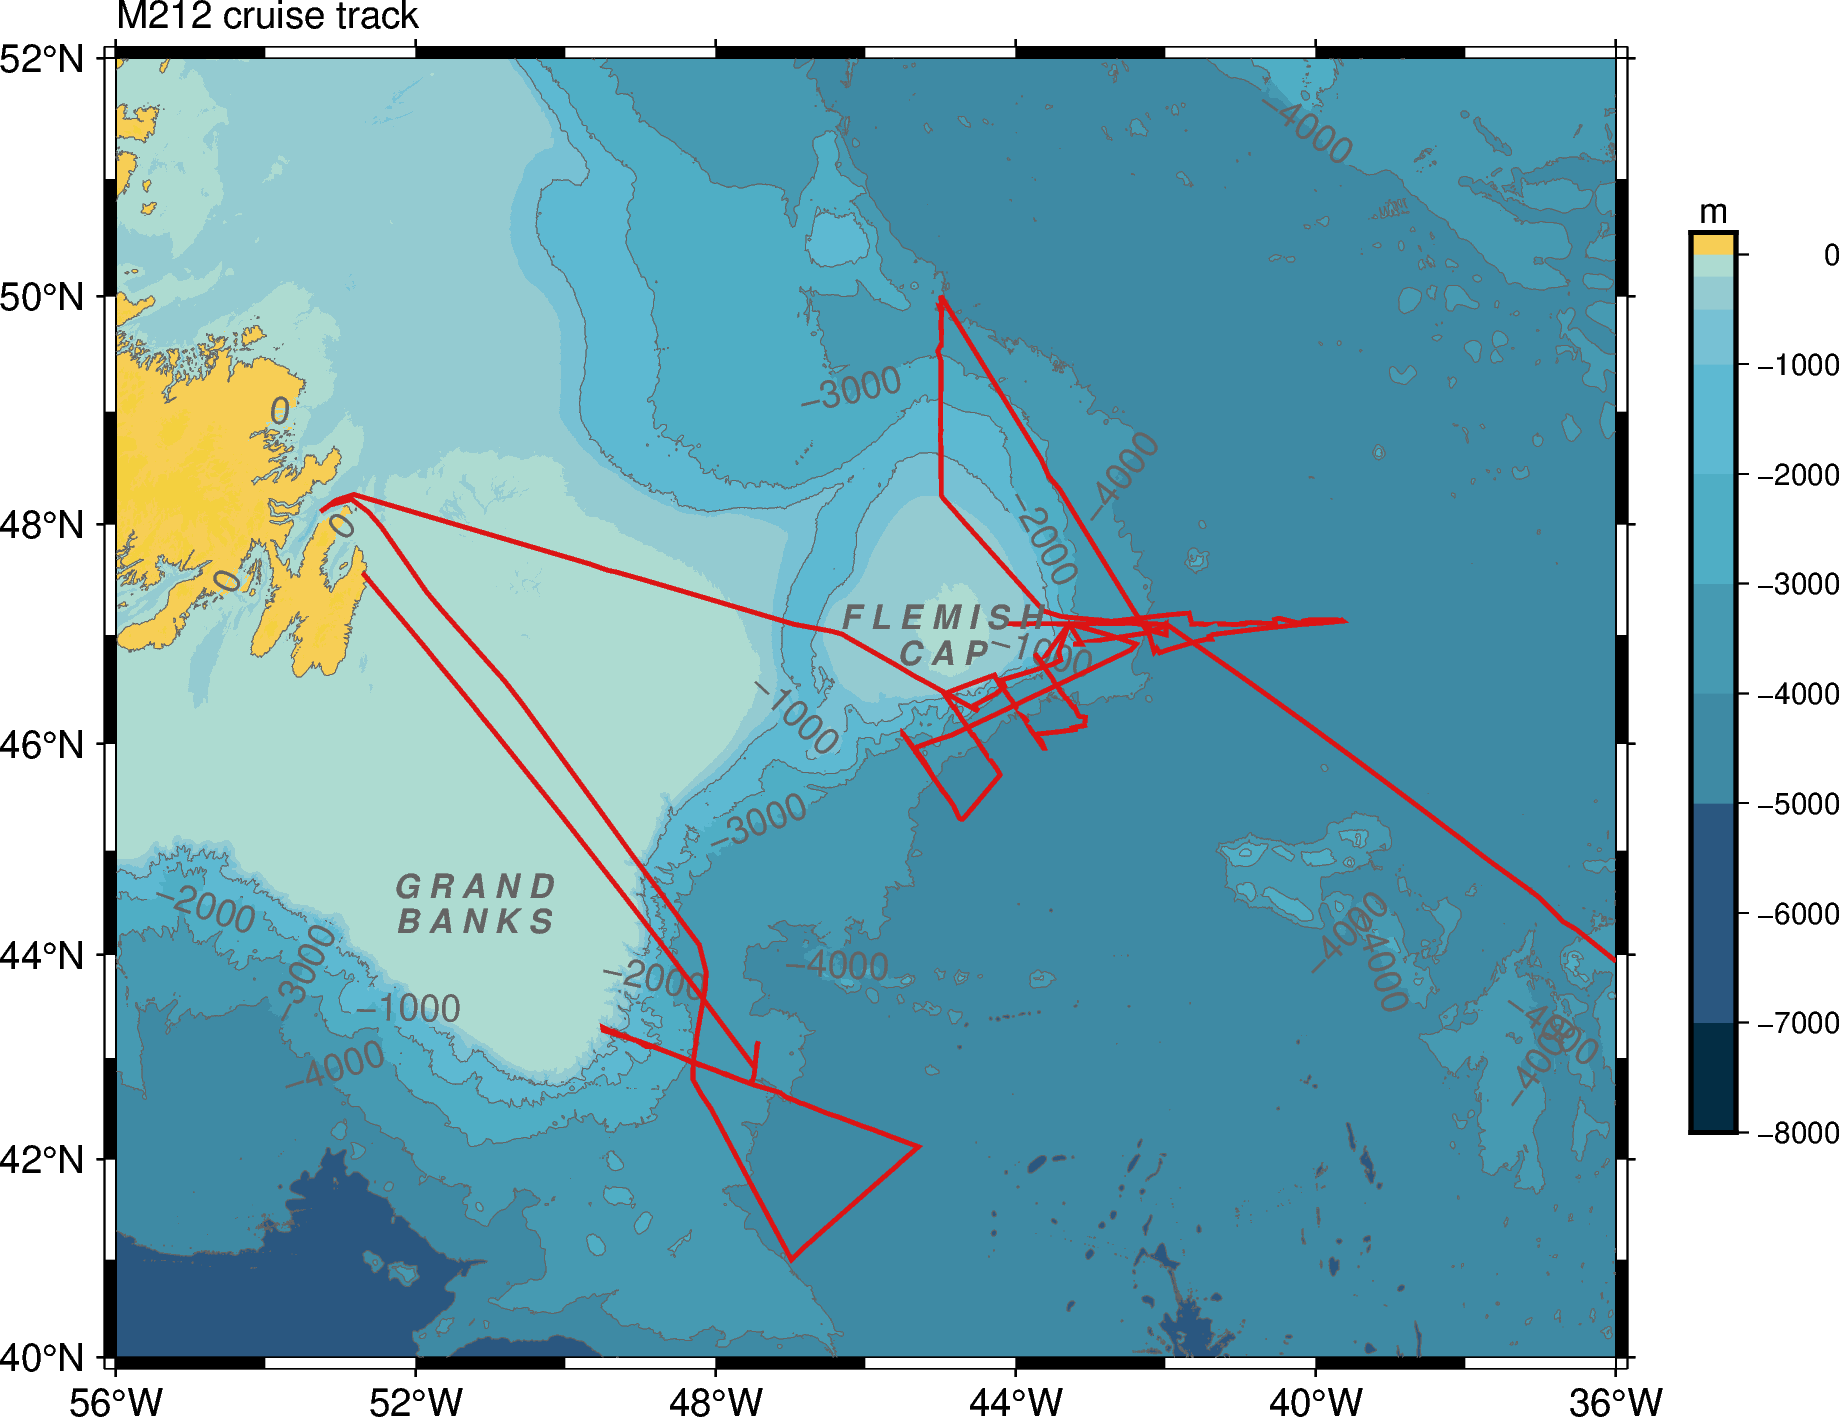

✓ Created map with ship track: data/ship_track_m212.xy
✓ Found 1 track files total


In [7]:
# Copy ship track files and create map with tracks
import shutil
import glob
from pathlib import Path
from oceanvis_py.plots.maps import plot_bathymetry_map
from oceanvis_py.core.colormaps import get_bathymetry_colormap

# Copy ship track files
source_pattern = "/Users/eddifying/Cloudfree/github/oceanvis-py/notebooks/gmtdata/ship_track_m212*.xy"
dest_dir = Path("data")
dest_dir.mkdir(exist_ok=True)

# Find and copy all matching files
track_files = []
for source_file in glob.glob(source_pattern):
    dest_file = dest_dir / Path(source_file).name
    shutil.copy2(source_file, dest_file)
    track_files.append(str(dest_file))
    print(f"Copied: {Path(source_file).name}")

# Define region and bathymetry file
region = (-56, -36, 40, 52)
bathymetry_file = "/Users/eddifying/Dropbox/data/GEBCO2/netcdf/M212_bathy_38N.52N_056W.036W.nc"

try:
    # Create map with ship track(s)
    if track_files:
        fig, output_file, temp_bathy = plot_bathymetry_map(
            bathymetry_file=bathymetry_file,
            region=region,
            projection="M5i",
            cpt_file=get_bathymetry_colormap("flemish_cap"),
            ship_track_file=track_files[0],  # Use first track file
            title="M212 cruise track",
            output_file="map_m212_with_track.png",
            dpi=300,
            return_figure=True
        )

        # Add geographic annotations
        fig.text(x=-51.25, y=44.55, text="G R A N D", justify="CB",
                font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)
        fig.text(x=-51.25, y=44.45, text="B A N K S", justify="CT",
                font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)
        fig.text(x=-45, y=47.05, text="F L E M I S H", justify="CB",
                font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)
        fig.text(x=-45, y=46.95, text="C A P", justify="CT",
                font="8p,Helvetica-BoldOblique,100/100/100", no_clip=True)

        # Save and show
        fig.savefig("map_m212_with_track.png", dpi=300)
        fig.show()

        # Clean up
        try:
            Path(temp_bathy).unlink()
        except FileNotFoundError:
            pass

        print(f"✓ Created map with ship track: {track_files[0]}")
        print(f"✓ Found {len(track_files)} track files total")

    else:
        print("No ship track files found matching the pattern")

except Exception as e:
    print(f"Error: {e}")
    print("Check file paths and PyGMT installation")